this is for reading the columns of entropy and add entropy of all atoms together in each frame to have the total entropy in that frame

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive#to open the google drive in colab
drive.mount('/content/drive')

Mounted at /content/drive


In [157]:
#read all parameters of header
timeSteps=[]
boxDim=[]
l=[]
num_frame=0
#with open(r'C:\bloodProject\NP\5937beads\np2.dat') as fp:   # to read lines if atomlist after "Atoms"
with open('/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/8rc_rod_janus_152lig_perpend/shell_entropy/dumpN_secondFrame.lammpstrj') as fp:
#with open(r'C:\vmd\dumpN_firstFrame.lammpstrj') as fp:

        for line in fp:
            if 'ITEM: TIMESTEP' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
  
                       
                    line = line.split()
                    boxDim.append(line[:])

In [158]:
#read coordinate part
time_counter=0
lines=[]

#df.loc[:,'x'] = df.loc[:,'x'].astype(float)
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
with open('/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/8rc_rod_janus_152lig_perpend/shell_entropy/dumpN_secondFrame.lammpstrj') as fp:
#with open(r'C:\vmd\dumpN.lammpstrj') as fp:  
       
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list
                    #print(line)
                    

In [159]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [160]:
#data frame for the whole dump file without separating by frame
df=pd.DataFrame(lines, columns=['atomType']) # to make a data frame of pandas from the list and put atomID name on the column
df[['atomType','atomID','entropy']] = df.atomType.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df

,atomType,atomID,entropy
0,6,157628,-nan
1,6,157633,-0.0309813
2,6,157642,-nan
3,6,157640,-nan
4,6,157621,-nan
...,...,...,...
303,6,157136,-0.408623
304,6,157141,-0.371284
305,6,157056,-0.293497
306,6,157106,-nan


In [161]:
# for whole dataframe
df = df.replace("-nan", 0)
df

,atomType,atomID,entropy
0,6,157628,0
1,6,157633,-0.0309813
2,6,157642,0
3,6,157640,0
4,6,157621,0
...,...,...,...
303,6,157136,-0.408623
304,6,157141,-0.371284
305,6,157056,-0.293497
306,6,157106,0


In [162]:
entropy=df.loc[:,"entropy"]
atomID=df.loc[:,"atomID"]


print (entropy)


0               0
1      -0.0309813
2               0
3               0
4               0
          ...    
303     -0.408623
304     -0.371284
305     -0.293497
306             0
307     -0.530081
Name: entropy, Length: 308, dtype: object


([<matplotlib.axis.XTick at 0x7f6cdc1a5330>,
 [Text(0, 0, '157628'),
  Text(100, 0, '157514'),
  Text(200, 0, '157289'),
  Text(300, 0, '157090')])

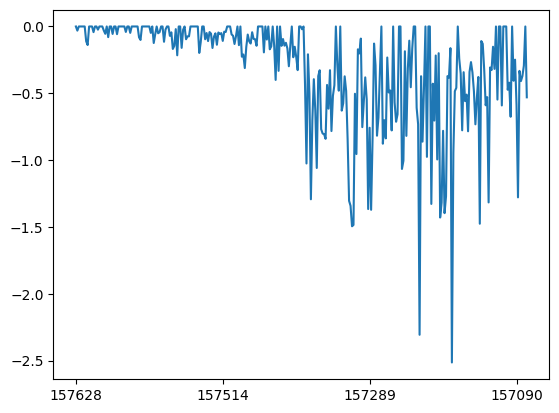

In [163]:
#Entropy of each bead
plt.plot(atomID,entropy,'-')
#plt.xscale('log')
#plt.xlim(0,330)
plt.xticks(np.arange(0,308,100)) #the distance of units to be shown in y axis. it starts from 10 to 30 with idistance of 10.thankGOD!

#plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/first_entropy_forth.png')

In [164]:

entropy=pd.to_numeric(entropy, errors='coerce')
entropy=entropy[entropy!=0]
entropy

1     -0.030981
7     -0.110594
8     -0.138839
12    -0.042379
15    -0.023760
         ...   
302   -0.332247
303   -0.408623
304   -0.371284
305   -0.293497
307   -0.530081
Name: entropy, Length: 216, dtype: float64

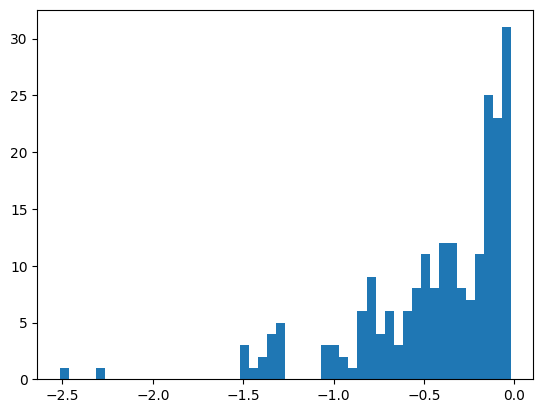

In [165]:
#ThankGOD! histogram plot of entropy
n_bins = 50
n,bins,patches=plt.hist(entropy, bins=n_bins)

#plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/first_entropy_histogram_two.png')

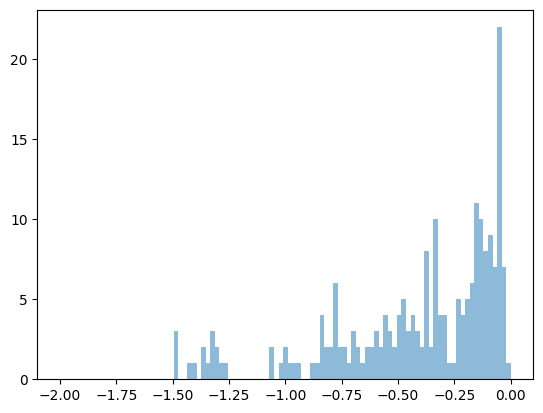

In [166]:
bins = np.linspace(-2, 0, 100)

#n,x,_ = plt.hist(entropy, bins, alpha=0.5, label='second_frame',histtype=u'bar')
n,y,_ = plt.hist(entropy, bins, alpha=0.5, label='twentyninth_frame',histtype=u'bar')

##Second file##

In [139]:
#read all parameters of header
timeSteps=[]
boxDim=[]
l=[]
num_frame=0
#with open(r'C:\bloodProject\NP\5937beads\np2.dat') as fp:   # to read lines if atomlist after "Atoms"
with open('/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/8rc_rod_janus_152lig_perpend/shell_entropy/dumpN_twentyseventhFrame.lammpstrj') as fp:
#with open(r'C:\vmd\dumpN_firstFrame.lammpstrj') as fp:

        for line in fp:
            if 'ITEM: TIMESTEP' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: NUMBER OF ATOMS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    timeSteps.append(line)# add the string in to the list
                    num_frame+=1
                    

            if 'ITEM: NUMBER OF ATOMS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: BOX BOUNDS' in line: 
                     break 
                   
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    #
                    num_atom=int(line)  

            if 'ITEM: BOX BOUNDS' in line:                                         
                for line in fp: # now you are at the lines you want
                    if 'ITEM: ATOMS' in line: 
                     break 
  
                       
                    line = line.split()
                    boxDim.append(line[:])

In [140]:
#read coordinate part
time_counter=0
lines=[]

#df.loc[:,'x'] = df.loc[:,'x'].astype(float)
#with open('/content/drive/My Drive/Case/nanoBloodProject/MSD/16rc/janus8rcNp/EG-lig118.1/nvt2') as fp:
with open('/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/8rc_rod_janus_152lig_perpend/shell_entropy/dumpN_twentyseventhFrame.lammpstrj') as fp:
#with open(r'C:\vmd\dumpN.lammpstrj') as fp:  
       
       for line in fp:
            atom_counter=0
            
            if 'ITEM: ATOMS' in line:
                time_counter+=1                                         
                
                for line in fp: # now you are at the lines you want
                    atom_counter+=1

                    #x(time_counter,atom_counter)=df.loc[line,'x'] 
                                        
                    if 'ITEM: TIMESTEP' in line: 
                     break 
                    
                    
                    line=line.rstrip()# to remove any white spaces at the end of the string                  
                    lines.append(line)# add the string in to the list
                    #lines[time_counter][atom_counter]=line# add the string in to the list
                    #print(line)

In [141]:
#remove empty lines from the list
while("" in lines) : 
    lines.remove("") 

In [143]:
#data frame for the whole dump file without separating by frame
df2=pd.DataFrame(lines, columns=['atomType']) # to make a data frame of pandas from the list and put atomID name on the column
df2[['atomType','atomID','entropy']] = df2.atomType.str.split(expand=True,) # to split one column to multiple columns and allocate name for each column
df2

,atomType,atomID,entropy
0,6,157628,-nan
1,6,157624,-nan
2,6,157633,-nan
3,6,157637,-nan
4,6,157642,-nan
...,...,...,...
303,6,157090,-2.19383
304,6,157095,-2.59644
305,6,157101,-2.32932
306,6,157106,-2.38363


In [144]:
# for whole dataframe
df2 = df2.replace("-nan", 0)
df2

,atomType,atomID,entropy
0,6,157628,0
1,6,157624,0
2,6,157633,0
3,6,157637,0
4,6,157642,0
...,...,...,...
303,6,157090,-2.19383
304,6,157095,-2.59644
305,6,157101,-2.32932
306,6,157106,-2.38363


In [145]:
entropy2=df2.loc[:,"entropy"]
atomID2=df2.loc[:,"atomID"]


print (entropy2)

0             0
1             0
2             0
3             0
4             0
         ...   
303    -2.19383
304    -2.59644
305    -2.32932
306    -2.38363
307    -3.16988
Name: entropy, Length: 308, dtype: object


([<matplotlib.axis.XTick at 0x7f6cdbbc82e0>,
 [Text(0, 0, '157624'),
  Text(100, 0, '157519'),
  Text(200, 0, '157146'),
  Text(300, 0, '157145')])

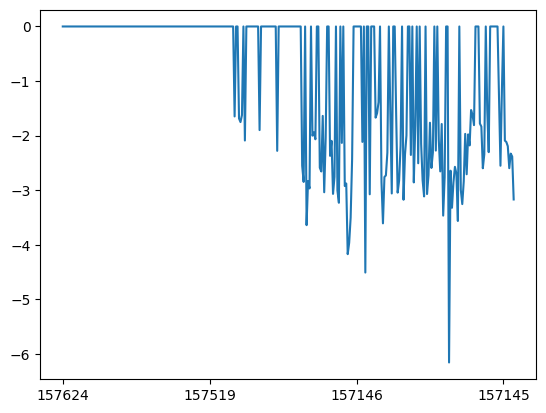

In [146]:
#Entropy of each bead
plt.plot(atomID,entropy2,'-')
#plt.xscale('log')
#plt.xlim(0,330)
plt.xticks(np.arange(0,340,100)) #the distance of units to be shown in y axis. it starts from 10 to 30 with idistance of 10.thankGOD!

#plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/first_entropy_forth.png')

In [147]:
entropy2=pd.to_numeric(entropy2, errors='coerce')
entropy2=entropy2[entropy2!=0]
entropy2

117   -1.64842
120   -1.68483
121   -1.75164
122   -1.62377
124   -2.08955
        ...   
303   -2.19383
304   -2.59644
305   -2.32932
306   -2.38363
307   -3.16988
Name: entropy, Length: 104, dtype: float64

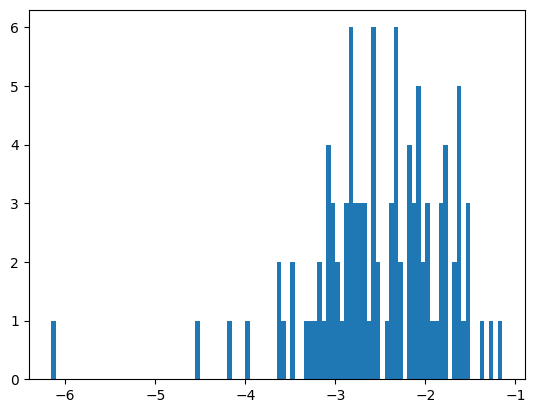

In [148]:
#ThankGOD! histogram plot of entropy
n_bins = 100
n,bins,patches=plt.hist(entropy2, bins=n_bins)
#plt.yticks(np.arange(0,4,1))

#plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/first_entropy_histogram_two.png')

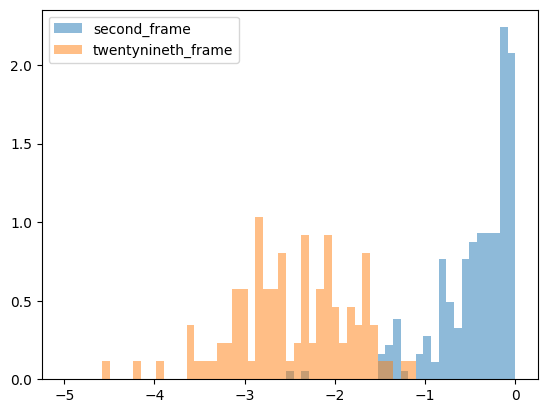

In [167]:
bins = np.linspace(-5, 0, 60)

n,x,_ = plt.hist(entropy, bins, alpha=0.5, label='second_frame',histtype=u'bar', density=True)
n,y,_ = plt.hist(entropy2, bins, alpha=0.5, label='twentynineth_frame',histtype=u'bar', density=True)
#plt.yticks(np.arange(0,31,10))

plt.legend(loc='upper left')
plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/8rc_rod_janus_152lig_perpend/shell_entropy/entropy_pdf2.png')

#bin_centers_x = 0.5*(x[1:]+x[:-1])
#bin_centers_y = 0.5*(y[1:]+y[:-1])
#plt.plot(bin_centers_x,n) ## using bin_centers rather than edges
#plt.plot(bin_centers_y,n) ## using bin_centers rather than edges
#plt.fill_between(bin_centers_x,n)
#plt.fill_between(bin_centers_y,n)
#plt.show()

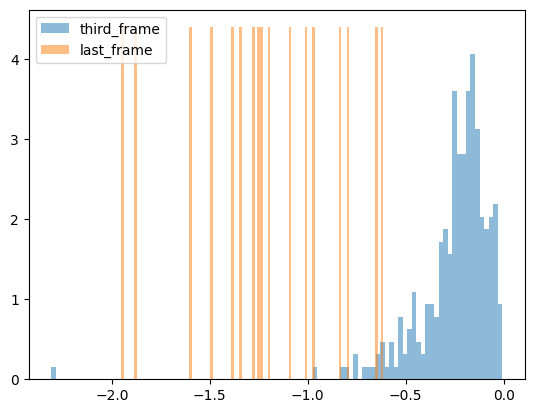

In [87]:

n_bins = 100
n, bins, patches = plt.hist(entropy, bins=n_bins, alpha=0.5, label='third_frame',histtype=u'bar', density=True)
n,bins,patches = plt.hist(entropy2, bins=n_bins, alpha=0.5, label='last_frame',histtype=u'bar', density=True)
#plt.xticks(np.arange(0,-0.25,-0.1))
#plt.yticks(np.arange(0,5,1))

plt.legend(loc='upper left')
plt.savefig(r'/content/drive/My Drive/Case/nanoBloodProject/properties/entropy_histogram/12rc_rod_homo_340lig/entropy_pdf4.png')